# Descriptive Analysis

In [ ]:
!pip install plotly

In [1]:
# packages
import pandas as pd, glob, numpy as np, os, re, time, json, nltk.collocations
from datetime import datetime
import nltk 
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk import word_tokenize, Text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import collections
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import unidecode
import spacy
from spacy.lang.pt.examples import sentences
from spacy.symbols import ORTH, POS, NOUN, VERB
import seaborn as sns
from itertools import combinations
import networkx as nx

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/andressa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# import dataset
data = pd.read_csv("collect_tweets_brawlstars.csv")

In [3]:
# dim dataset
data.shape

(625, 3)

In [4]:
# head
data.head()

,Unnamed: 0,data_create,replies
0,0,2020-09-10 14:55:54,@BrawlStars @Dani_Supercell @Frank_Supercell y...
1,1,2020-09-10 14:53:32,@BrawlStars https://t.co/iT5VdOXIIA
2,2,2020-09-10 14:50:43,@BrawlStars Why did you bring back those old m...
3,3,2020-09-10 14:50:29,@BrawlStars MECHA PALADIN SURGE-S LAST STAGE I...
4,4,2020-09-10 14:50:10,@BrawlStars Can you guys just buff coltltte


In [5]:
data.data_create.min()

'2020-09-10 14:12:31'

In [6]:
data.data_create.max()

'2020-09-10 14:56:40'

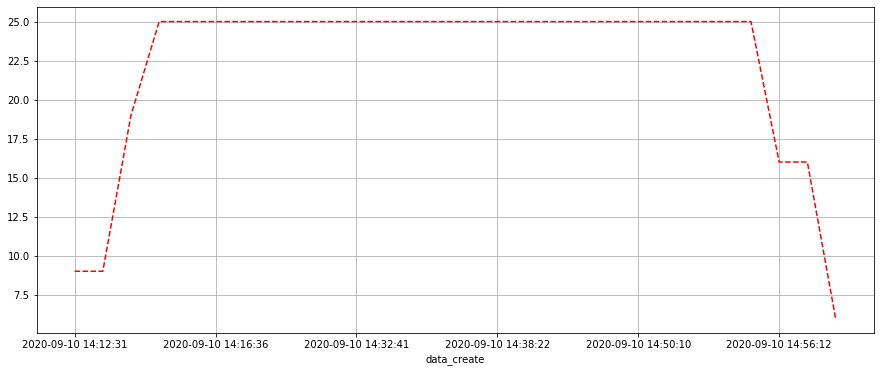

In [7]:
# time series
reactions = data.groupby(['data_create']).count()
ax = reactions.replies.plot(figsize=(15,6),ls='--',c='red')
ax.xaxis.grid(True)
ax.yaxis.grid(True)

In [8]:
# top 3 texts
reactions = data.iloc[:,[1,2]].groupby(['replies']).count()

In [9]:
reactions.sort_values(by=['data_create'],ascending=False).iloc[0:3,:]

,data_create
replies,
@BrawlStars If you guys end up changing collet special how is this idea: Once collet super is charge she can th… https://t.co/liaJlG697R,25
@BrawlStars @BrawlStars change Colettes mechanic it is garage,25
RT @biguzivertReal: @BrawlStars yo why is colt so damn thick https://t.co/XkvKSUFmCP,25


### Word Cloud

In [10]:
data = data.dropna(subset=['replies'])
data = data.drop_duplicates('replies')
data = data.reset_index(drop=True)

In [11]:
data = data.reset_index(drop=True)
data.shape

(28, 3)

In [12]:
def analysis_words(data, message):
    df = data.dropna(subset=[message])
    df = df.reset_index()
    text = ""
    for i in range(0, len(df[message])):
            text = text + " " + df[message][i]
    
    sw = stopwords.words('portuguese')

    words = word_tokenize(text)
#    words = [w.lower() for w in words if w.isalpha() and len(w) > 3]
    words = [w for w in words if w not in sw]
#    words = [PorterStemmer().stem(w) for w in words]

    text = ""
    for i in words:
        text = text +" "+ str(i)
    d = Counter(words)
    

    return(text)


In [13]:
text = analysis_words(data, "replies")

In [14]:
text

" @ BrawlStars @ Dani_Supercell @ Frank_Supercell you can see if 8 bit hides in the grass if he uses new star power fix… https : //t.co/aMfw2EzOU8 @ BrawlStars https : //t.co/iT5VdOXIIA @ BrawlStars Why did you bring back those old maps ? @ BrawlStars MECHA PALADIN SURGE-S LAST STAGE IS GLITCHED ! ( does n't have sword and wing too ) @ BrawlStars Can you guys just buff coltltte @ BrawlStars FIX THE GALE GADGET PLIS ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! … https : //t.co/adMIYS8tbn @ BrawlStars WHEN IS THE UPDATE COMING TO IPHONE I CANT PLAY 😭😭😭 @ BrawlStars So where is the Giftshop ? @ BrawlStars I cant join the game , i have good conection any suggestions ? https : //t.co/J3qu8rKQpZ @ BrawlStars POR FAVOR PODERIAM ME AJUDAR , EU TO COM PROBLEMA NO BRAWL , NÃO É MINHA INTERNET , EU JA ATUALIZEI O JOGO , … https : //t.co/iAtDLqndPO @ BrawlStars when we will see the item

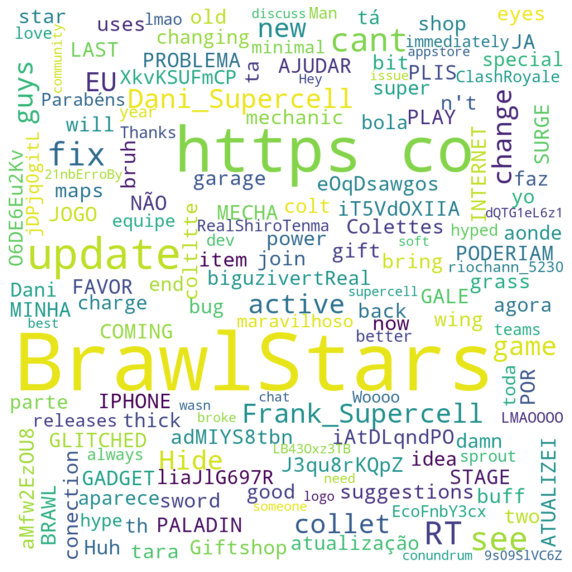

In [15]:
plt.figure(figsize=[10,15])

# Create the wordcloud object

wordcloud = WordCloud(background_color="white", width=1000, height=1000, margin=0).generate(text)
 
# Display the generated image:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Trigrams

In [16]:
def pad_words(s):
    s = unidecode.unidecode(s)
    
    # removes special characters with ' ' 
    s = re.sub('[^a-zA-z\s]', '', s)
    s = s.lower()
    s = re.sub('_', '', s) 
    
    # Change any white space to one space 
    s = re.sub('\s+', ' ', s) 
    
    s = word_tokenize(s)
    s = [w for w in s if w.isalpha() and len(w) >= 3]

    text = ""
    
    for i in s:
        text = text +" "+ str(i)
    
    return(text)

In [17]:
text = data.replies.dropna().unique().tolist()
text = [pad_words(x) for x in text]

In [18]:
stop_words = set(stopwords.words('english')) 

for i, line in enumerate(text): 
    text[i] = ' '.join([x for x in nltk.word_tokenize(line) if ( x not in stop_words )])

# trigrams
vector_text = CountVectorizer(ngram_range = (3,3))
X = vector_text.fit_transform(text)
f_text = (vector_text.get_feature_names()) 

# TFIDF 
vector_text = TfidfVectorizer(ngram_range = (3,3)) 
Y = vector_text.fit_transform(text) 

# ranking - top 10
sums = Y.sum(axis = 0) 
df = [] 

for col, term in enumerate(f_text): 
    df.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(df, columns = ['Words Trigram','Ranking']) 
words = (ranking.sort_values('Ranking', ascending = False)) 

words.head(10)

,Words Trigram,Ranking
36,brawlstars thanksfranksupercell httpstcoecofnbycx,1.000000
30,brawlstars lmaoooo httpstconberroby,0.707107
26,brawlstars guys buff,0.707107
77,guys buff coltltte,0.707107
115,riochann brawlstars lmaoooo,0.707107
9,best supercells game,0.707107
15,brawlstars best supercells,0.707107
35,brawlstars see item,0.577350
20,brawlstars cant see,0.577350
39,bring back old,0.577350


### Graphs

In [ ]:
def flatten_text_tranform(a):    

    for i in a:
        if isinstance(i, collections.Iterable) and not isinstance(i, (str, bytes)):
            yield from flatten_text_tranform(i)
        else:
            yield i

In [ ]:
def remove_emoji_text(text):

    emoji_pattern = re.compile(
        u'(\U0001F1F2\U0001F1F4)|'       
        u'([\U0001F1E6-\U0001F1FF]{2})|' 
        u'([\U0001F600-\U0001F64F])'     
        "+", flags=re.UNICODE)

    return emoji_pattern.sub('', text)

In [ ]:
def clean_text(text, stopwords=None, words_to_replace=None):

    text = re.compile("(\r)|(\n)").sub(r" ", text)
    text = text.lower()

    text = re.compile("(#\S+)|(@\S+)|(http\S+)|([^\w\s])|(\S+\.com\S+)").sub(r" ", text)
    text = re.compile("\S+(\w)\\1{2,}\S+").sub(r" ", text)
    text = re.compile("\S+(ha)\\1{2,}\S+").sub(r" ", text)
    text = remove_emoji_text(text)
    
    words = Text(word_tokenize(text))
    words = [word for word in words]
    
    if stopwords:
        words = [word for word in words if (word not in stopwords) and (len(word) > 1)]
    
    return words

In [ ]:
def get_bigrams(words, window=3):

    result = []
    bigram = []
    
    for i in range(1,len(words)-1):
        wword = words[i-1:i+(window-1)]
        combns = list(combinations(wword,2))
        bigram.extend(combns)

    bigram = [tuple(sorted(tup)) for tup in bigram]

    result.extend(bigram)

    return(result)

In [ ]:
def graph(bigram, label):

    d = {}
    for node in bigram:
        try:
            d[node] = d[node] + 1
        except:
            d[node] = 1

    g = nx.DiGraph()
    for k, v in d.items():
        g.add_edge(k[0], k[1], label=label, weight=v)
            
    return g

In [ ]:
data["words"] = data.replies.apply(lambda x: clean_text(text=x))

In [ ]:
data["words"]

In [ ]:
data["text"] = data["words"].apply(lambda x: ' '.join(x))

In [ ]:
data["text"]

In [ ]:
# graph structure

words = list(flatten_text_tranform(data.words.to_list()))
bg = get_bigrams(words)
G = graph(bg, 'brawlstars')
nx.write_graphml(G, f"brawlstars.graphml")